In [ ]:
"""
This code implements LSTM for chessgame WIN/LOSS/DRAW prediction.
"""
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

<font color = steel size = 5>Load the data, there should be string lists of data, opening label and win-lose label</font>

In [ ]:
def read_data(file_name):
    
    chess_openings = []
    chess_moves = []
    chess_result =[]
    
    with open(file_name,'r') as f:
        
        lines = f.readlines()
    
        lines = [s.strip() for s in lines]
        
    num_lines = len(lines)

    i = 0
    
    while i < num_lines:
        
        current_line_opening = lines[i]
        
        if 'Result' in current_line_opening :
            chess_result.append(current_line_opening[9:-2])

        if 'Opening' in current_line_opening :
            chess_openings.append(current_line_opening)
        
        if "1. " in current_line_opening :
            if current_line_opening.find(" 6.")!= -1 :
                chess_moves.append(current_line_opening[0:current_line_opening.find(" 6.")])
            else:
                index_0 = current_line_opening.find("0-")
                index_1 = current_line_opening.find("1/2-")
                index_2 = current_line_opening.find("1-")
                if index_0 != -1:
                    chess_moves.append(current_line_opening[0:index_0 -1])
                elif index_1 != -1:
                    chess_moves.append(current_line_opening[0:index_1 -1])
                elif index_2 != -1:
                    chess_moves.append(current_line_opening[0:index_2 -1])
                else:
                    chess_moves.append(current_line_opening)
            
        i += 1
    
    return chess_openings,chess_moves,chess_result

In [ ]:
file_name = 'chess_moves_data.txt'
r,data,win_lose = read_data(file_name)

In [ ]:
opening = []
#For openings
for i in range(0,len(r)):
    o = r[i][10:-2]
    arr =  o.split(" ")
    p_o = '' 
    for item in arr:
    # r[i] = arr[0]+ arr[1]
        if(len(p_o)!=0):
            p_o +=' '
        if(item.find(":")!= -1):
            p_o +=item[:item.find(":")]
            break
        else:
            p_o +=item
    # print(p_o)
    opening.append(p_o)

In [ ]:
for i in range(0,len(opening)):
    s = opening[i]
    if s.find(" #") != -1:
        opening[i] = s[0:s.find(" #")]
    if s.find(",") != -1:
        opening[i] = s.split(",")[0]

In [ ]:
print(win_lose[0])

1-0


In [ ]:
classes = ['Sicilian Defense',"Queen's Pawn Game",'French Defense',"King's Pawn Game",'Scandinavian Defense','Philidor Defense',"Van't Kruijs Opening",'English Opening','Italian Game','Ruy Lopez']

idxes = [i for i in range(len(opening)) if  opening[i] in classes]

test_openings = [opening[i] for i in idxes]
test_win_lose = [win_lose[i] for i in idxes]
test_data = [data[i] for i in idxes]

In [ ]:
from collections import Counter
print(Counter(win_lose))
print("\n")
print(data[0:100])

Counter({'1-0': 62129, '0-1': 55221, '1/2-1/2': 3982})


['1. e4 e6 2. d4 b6 3. a3 Bb7 4. Nc3 Nh6 5. Bxh6 gxh6', '1. d4 d5 2. Nf3 Nf6 3. e3 Bf5 4. Nh4 Bg6 5. Nxg6 hxg6', '1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. Nc3 Bc5 5. a3 Bxf2+', '1. e4 c6 2. Nc3 d5 3. Qf3 dxe4 4. Nxe4 Nd7 5. Bc4 Ngf6', '1. e4 e6 2. f4 d5 3. e5 c5 4. Nf3 Qb6 5. c3 Nc6', '1. e4 b6 2. Bc4 Bb7 3. d3 Nh6 4. Bxh6 gxh6 5. Qf3 e6', '1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. d3 Bc5 5. c3 O-O', '1. e4 e5 2. c4 Bc5 3. Nf3 d6 4. d3 a6 5. a3 Bg4', '1. d4 c5 2. c4 d6 3. Bf4 g6 4. Nf3 Bh6 5. Bxh6 Nxh6', '1. d4 e5 2. dxe5 d6 3. exd6 Bxd6 4. Nf3 Nf6 5. Nc3 O-O', '1. e4 g6 2. d4 d6 3. Nf3 c6 4. h3 Nf6 5. Bg5 Nxe4', '1. e4 e6 2. d4 d5 3. Nc3 Nf6 4. Bg5 Be7 5. Bxf6 Bxf6', '1. e4 e5 2. Nf3 Nc6 3. Bc4 Bc5 4. a3 Qf6 5. b4 Bb6', '1. e4 e5 2. Nf3 Nc6 3. Bb5 Nge7 4. Nc3 h6 5. Nd5 a6', '1. e4 c5 2. f4 d5 3. exd5 Qxd5 4. Nc3 Qd8 5. Bc4 Bf5', '1. b3 e5 2. Bb2 e4 3. d3 Nf6 4. Nh3 d5 5. dxe4 Nxe4', '1. e4 e6 2. d4 d5 3. e5 c5 4. c3 Ne7 5. f4 cxd4', '1. e4 e6 

In [ ]:
import numpy as np
import pandas as pd


win_lose = pd.DataFrame(test_win_lose)
data = pd.DataFrame(test_data)

 
concacted = pd.concat([data,win_lose],axis= 1)
concacted.columns = ['data','win_lose']
concacted = concacted.dropna()


In [ ]:
temp_data = concacted["data"]
cols = [i  for i in range(0,len(temp_data)) if temp_data[i].find("eval") != -1]
concacted = concacted.drop(cols,axis=0,)


In [ ]:
# concacted.to_csv("LSTM_concacted.csv")

In [ ]:
# # print(cols)
# print(type(pd.DataFrame(concacted["data"])))
# pd.DataFrame(concacted["opening"]).to_csv("opening.csv", index= None,header=None)
# pd.DataFrame(concacted["win_lose"]).to_csv("win_lose.csv", index= None,header=None)
# pd.DataFrame(concacted["data"]).to_csv("data.csv", index= None,header=None)

In [ ]:
data = np.array(concacted["data"])
win_lose = np.array(concacted["win_lose"])

<font color = steel size = 5>Transform the data and labels to tensor so that they can be filled in CNN</font>

In [ ]:
max_len =len(max(data,key=len))

print(max_len)

embeded_movements = [x + " "* (max_len-len(x)) for x in data]

for x in embeded_movements:
    if len(x) != max_len:
        print("warning")

embeded_movements = np.array(embeded_movements).reshape(-1,1)

59


In [ ]:
# from sentence_transformers import SentenceTransformer

# model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# max_len = max(data,key=len)

# embeded_movements = model.encode(data)


In [ ]:
from collections import Counter
import numpy as np

def resultToIndex(o):
    return all_result.index(o)

all_result = list(Counter(win_lose).keys())

result_labels = []

for o in win_lose:
    result_labels.append(resultToIndex(o))


result_labels = np.array(result_labels)
print(len(embeded_movements))
print(len(result_labels))

58571
58571


In [ ]:
from  imblearn.over_sampling import RandomOverSampler

model_RandomOverSampler=RandomOverSampler()

embeded_movements,result_labels =  model_RandomOverSampler.fit_resample(embeded_movements,result_labels) 

In [ ]:
print(len(embeded_movements))
print(len(result_labels))
print(embeded_movements.shape)
print(result_labels.shape)

87954
87954
(87954, 1)
(87954,)


In [ ]:
# for x in embeded_movements:
#     print(len(x[0]))

In [ ]:
import string

all_letters = string.ascii_letters + " .,;'"    


def letterToIndex(letter):
    return all_letters.find(letter)


def lineToTensor(line):
    tensor = torch.zeros(len(line), len(line[0][0]))
    for i,l in enumerate(line):
        for j in range(len(l[0])):
            tensor[i][j] = letterToIndex(l[0][j])
    return tensor


embeded_movements = lineToTensor(embeded_movements)



In [ ]:
print(embeded_movements.shape)

torch.Size([87954, 59])


In [ ]:
import math
import torch
import random

shuffle_index = [i for i in range(len(embeded_movements))]

random.shuffle(shuffle_index)


# random.shuffle(shuffle_index)
embeded_movements = embeded_movements[shuffle_index]
result_labels = result_labels[shuffle_index]
# win_lose = win_lose[shuffle_index]


test_ratio = 0.2
sep_index_test = int(len(embeded_movements) * (1- test_ratio))

embeded_movements_test = embeded_movements[sep_index_test:]
result_labels_test = result_labels[sep_index_test:]


embeded_movements_sep = embeded_movements[:sep_index_test]
result_labels_sep = result_labels[:sep_index_test]


train_ratio = 0.85

sep_index = int(len(embeded_movements_sep) * train_ratio)


embeded_movements_train  = embeded_movements_sep[:sep_index]
result_labels_train = result_labels_sep[:sep_index]

embeded_movements_valid  = embeded_movements_sep[sep_index:]
result_labels_valid = result_labels_sep[sep_index:]


In [ ]:
# def reShape(data, label,n_steps = 40,step =40):
#     segments = []
#     labels = []
#     for i in range(0, len(data) - n_steps, step):
#         data_s = data[i: i + n_steps]
#         label_s =label[i: i + n_steps]
#         counts = np.bincount(label_s)
#         segments.append(data_s)
#         labels.append(np.argmax(counts))

#     return segments,labels


# embeded_movements_train, result_labels_train = reShape(embeded_movements_train,result_labels_train)

# embeded_movements_valid, result_labels_valid = reShape(embeded_movements_valid,result_labels_valid)


# embeded_movements_train = np.array(embeded_movements_train)
# result_labels_train = np.array(result_labels_train)

# embeded_movements_valid = np.array(embeded_movements_valid)
# result_labels_valid = np.array(result_labels_valid)


In [ ]:
print(Counter(result_labels_train.tolist()))
print(Counter(result_labels_valid.tolist()))
print(Counter(result_labels_test.tolist()))

Counter({2: 19956, 1: 19943, 0: 19909})
Counter({2: 3548, 0: 3524, 1: 3483})
Counter({1: 5892, 0: 5885, 2: 5814})


In [ ]:

result_labels_train= torch.from_numpy(np.array(result_labels_train)).long()

result_labels_valid= torch.from_numpy(np.array(result_labels_valid)).long()


batch_num = 200
train_batch_size =len(embeded_movements_train)/batch_num
valid_batch_size = len(embeded_movements_valid)/batch_num
test_batch_size = len(embeded_movements_test)/batch_num

Train_data_batch = {}
Train_label_batch = {}
for i in range (0,batch_num):
  Train_data_batch[i] = embeded_movements_train[math.floor(i*train_batch_size):math.floor((i+1)*train_batch_size)].cuda()
  Train_label_batch[i] = result_labels_train[math.floor(i*train_batch_size):math.floor((i+1)*train_batch_size)].cuda()
  # print(len(Train_data_batch[i]))
  # print(len(Train_label_batch[i]))
  # print(Counter(Train_label_batch[i]))

Valid_data_batch = {}
Valid_label_batch = {}
for i in range (0,batch_num):
  Valid_data_batch[i] = embeded_movements_valid[math.floor(i*valid_batch_size):math.floor((i+1)*valid_batch_size)].cuda()
  Valid_label_batch[i] = result_labels_valid[math.floor(i*valid_batch_size):math.floor((i+1)*valid_batch_size)].cuda()


Test_data_batch = {}
for i in range (0,batch_num):
  Test_data_batch[i] = embeded_movements_test[math.floor(i*test_batch_size):math.floor((i+1)*test_batch_size)].cuda()

In [ ]:
# for i in range(len(Train_label_batch)):
#     print(Counter(Train_label_batch[i].tolist()))
# for i in range(len(Valid_label_batch)):
#     print(Counter(Valid_label_batch[i].tolist()))

In [ ]:
print(Test_data_batch[0].shape)

torch.Size([87, 59])


<font color = steel size = 5>Training</font>

In [ ]:
import torch.nn as nn

class LSTM_RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size,num_layers = 2):
        super(LSTM_RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.num_layers = num_layers
        self.cell = nn.LSTM(input_size = self.input_size, hidden_size = self.hidden_size, num_layers = self.num_layers,batch_first = True, bidirectional = False)
        self.bn = nn.BatchNorm1d(self.output_size)
        self.f = nn.Linear(self.hidden_size, self.output_size)
        self.dropout = nn.Dropout(0.2)
        self.a = nn.ReLU()
        

    def forward(self, input, hidden, cell):

        output, (hidden,cell) = self.cell(input,(hidden,cell))
        
        output = self.f(output)

        # output = self.bn(output)
        output = self.a(output)

        output = self.dropout(output)


        return output, hidden, cell

    def init_zeros(self, x,hidden_size = 0):
        
        if hidden_size == 0:
            hidden_size = self.hidden_size

        if x.ndim == 2:
          return torch.zeros(self.num_layers,hidden_size).cuda()
        else:
          return torch.zeros(self.num_layers,x.size(0),hidden_size).cuda()

In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay,f1_score

def train_LSTM(model, criterion,optimizer, epochs):


    loss_index = []
    train_losslist = []
    valid_losslist = []

    max_f1_score = -np.Inf # track change in validation loss
    
    for t in range(epochs):
        ######################
        # Training the model #
        ######################
        loss_training = 0
        loss_validating = 0

        model.train()
        
        for i in range (0,batch_num):

            hidden = model.init_zeros(Train_data_batch[i])
            cell =  model.init_zeros(Train_data_batch[i])
            
            
           
            # Forward pass: Computing predicted outputs
            output, hidden, cell = model(Train_data_batch[i],hidden, cell)
            
            
            # Calculating the batch loss
            loss = criterion(output, Train_label_batch[i])
            
            # Clearing the gradients of all optimized variables
            optimizer.zero_grad()

            # Backward pass: compute gradient of loss with respect to parameters
            loss.backward()
            # Perform a single optimization step (parameter update)
            optimizer.step()
            
            

            # Update training loss
            loss_training += loss.item()*(len(Train_data_batch[i]))
        


        ########################    
        # Validating the model #
        ########################
        model.eval()

        Y_test_pred_raw= []
        for i in range (0,batch_num):

            hidden = model.init_zeros(Valid_data_batch[i])
            cell =  model.init_zeros(Valid_data_batch[i])
            model.zero_grad()
            output, hidden, cell = model(Valid_data_batch[i],hidden, cell)
            loss = criterion(output, Valid_label_batch[i])

            Y_test_pred_raw += predictLSTM(model,Test_data_batch[i])
            # Update validating loss
            loss_validating += loss.item()*(len(Valid_data_batch[i]))
            

        # Calculating average losses
        train_loss = loss_training/len(embeded_movements_train)
        valid_loss = loss_validating/len(embeded_movements_valid)


        loss_index.append(t+1)
        train_losslist.append(train_loss)
        valid_losslist.append(valid_loss)

        
        # if t % 500 == 0:
        print("[Epoch {t:5d} of {epochs}] Train loss: {train_loss:1.6f}, Validation Loss: {valid_loss:.6f}".format(
            t=t+1,epochs = epochs,train_loss = train_loss,valid_loss=valid_loss))


        Y_test_prediction = Y_test_pred_raw

        # print(Counter(result_labels_test))
        # print(len(result_labels_test))
        # print(len(Y_test_prediction))
        # print(Y_test_prediction.shape)

        test_f1_score = f1_score(result_labels_test,Y_test_prediction, average="macro")
        print('Validation f1 score: {:.6f} '.format(test_f1_score))
        # Saving model if validation loss has decreased
        if test_f1_score > max_f1_score:
            
            print('Validation f1 score increased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                max_f1_score,test_f1_score))
            torch.save(model.state_dict(), 'model_cifar.pt')
            max_f1_score = test_f1_score

    return loss_index,train_losslist,valid_losslist


def predictLSTM(model,data):
    hidden = model.init_zeros(data)
    cell =  model.init_zeros(data)
    model.zero_grad()
    pred,hidden,cell = model(data,hidden,cell)
    pred =pred.cpu().detach().numpy()
    pred = np.argmax(pred,axis=1)
    return pred.tolist()

In [ ]:
model = LSTM_RNN(59, 96, 3).to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.0001, weight_decay=0)
epochs = 50

print(model)

LSTM_RNN(
  (cell): LSTM(59, 96, num_layers=2, batch_first=True)
  (bn): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (f): Linear(in_features=96, out_features=3, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (a): ReLU()
)


In [ ]:
loss_index,train_losslist,valid_losslist = train_LSTM(model,criterion,optimizer,epochs)

[Epoch     1 of 50] Train loss: 1.098517, Validation Loss: 1.097886
Validation f1 score: 0.298877 
Validation f1 score increased (-inf --> 0.298877).  Saving model ...
[Epoch     2 of 50] Train loss: 1.097443, Validation Loss: 1.096952
Validation f1 score: 0.264846 
[Epoch     3 of 50] Train loss: 1.096401, Validation Loss: 1.095674
Validation f1 score: 0.304852 
Validation f1 score increased (0.298877 --> 0.304852).  Saving model ...
[Epoch     4 of 50] Train loss: 1.094726, Validation Loss: 1.094256
Validation f1 score: 0.299998 
[Epoch     5 of 50] Train loss: 1.091537, Validation Loss: 1.090651
Validation f1 score: 0.359660 
Validation f1 score increased (0.304852 --> 0.359660).  Saving model ...
[Epoch     6 of 50] Train loss: 1.086155, Validation Loss: 1.085920
Validation f1 score: 0.379232 
Validation f1 score increased (0.359660 --> 0.379232).  Saving model ...
[Epoch     7 of 50] Train loss: 1.079662, Validation Loss: 1.080551
Validation f1 score: 0.385359 
Validation f1 score

In [ ]:


model.load_state_dict(torch.load('model_cifar.pt'))



<All keys matched successfully>

In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay,f1_score

Yhat_test = []
# print(clf.predict(X_Valid_batch[0]))
for i in range (0,batch_num):
    # print(clf.predict(X_Valid_batch[0]))
    prediction = predictLSTM(model,Test_data_batch[i])
    Yhat_test += prediction

# dasfads = opening_labels_test.values().tolist()
# print(Counter(dasfads))
print(Counter(Yhat_test))
print(Counter(result_labels_test))


print('Test Accuracy = {score:.5}'.format(score=accuracy_score(result_labels_test,Yhat_test)))
print('F1 Score = {f1score:.5}'.format(f1score=f1_score(result_labels_test,Yhat_test, average="macro")))

Counter({2: 6865, 0: 5368, 1: 5358})
Counter({1: 5892, 0: 5885, 2: 5814})
Test Accuracy = 0.46035
F1 Score = 0.4553


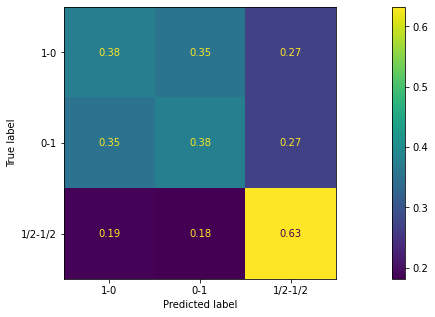

In [ ]:
import matplotlib.pyplot as plt

# Plotting confusion matrix
cm = confusion_matrix(result_labels_test,Yhat_test,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=all_result)
fig, ax = plt.subplots(figsize=(20,5))
disp.plot(ax = ax)

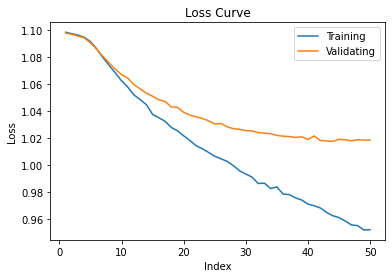

In [ ]:
plt.plot(loss_index, train_losslist,loss_index, valid_losslist)
plt.xlabel("Index")
plt.ylabel("Loss")
plt.legend(["Training","Validating"])
plt.title("Loss Curve")
plt.show()